In [1]:
import geopandas as gpd
import pandas as pd

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile

from discretize import TensorMesh

from SimPEG.utils import plot2Ddata, surface2ind_topo
from SimPEG.potential_fields import gravity
from SimPEG import (
    maps,
    data,
    data_misfit,
    inverse_problem,
    regularization,
    optimization,
    directives,
    inversion,
    utils,
)



In [1]:
#sagrav = gpd.read_file(r'C:\users\rscott\Downloads\gravity_stations_shp\gravity_stations.shp')  #test 

In [3]:
print(sagrav['MGA_ZONE'].unique())
sagrav.head()

[54 53 52]


SURVEY_NAM  BA_1984_MG BASE_STATI  OG_ORIGINA     OG_UNIT  \
0  LEIGH CREEK NORTH (1948E0)     -28.989       None   979299.20  1965_mgals   
1  LEIGH CREEK NORTH (1948E0)     -28.115       None   979299.92  1965_mgals   
2  LEIGH CREEK NORTH (1948E0)     -26.205       None   979301.43  1965_mgals   
3  LEIGH CREEK NORTH (1948E0)     -28.686       None   979299.26  1965_mgals   
4  LEIGH CREEK NORTH (1948E0)     -27.196       None   979300.79  1965_mgals   

   OG_1965_MG   OG_1984_UM  BA_1965_MG  BA_1984_UM   NOTES SURVEY_COD  \
0   979299.20  9792848.398     -28.380    -289.895    H 23     1948E0   
1   979299.92  9792855.595     -27.504    -281.147    G 23     1948E0   
2   979301.43  9792870.694     -25.593    -262.050  RD 6.5     1948E0   
3   979299.26  9792848.996     -28.075    -286.857    G 24     1948E0   
4   979300.79  9792864.295     -26.585    -271.965  RD 7.0     1948E0   

   STATION_ID   MGA_EAST   MGA_NORTH  MGA_ZONE   LONGITUDE   LATITUDE  \
0         823  253947.68  6652415.74        54  138.443229 -30.234936   
1         723  253972.72  6651602.12        54  138.443298 -30.242276   
2          13  254242.84  6650981.48        54  138.445958 -30.247926   
3         724  254803.12  6651635.19        54  138.451929 -30.242146   
4          14  254923.58  6651330.63        54  138.453109 -30.244916   

   AHD_ELEVAT  OG_1984_MG                     geometry  
0  145.080002  979284.840  POINT (138.44322 -30.23495)  
1  148.800003  979285.560  POINT (138.44329 -30.24229)  
2  153.089996  979287.069  POINT (138.44595 -30.24794)  
3  149.199997  979284.900  POINT (138.45192 -30.24216)  
4  150.100006  979286.429  POINT (138.45310 -30.24493)

In [4]:
#survey_array = sagrav[['LONGITUDE','LATITUDE','AHD_ELEVAT','BA_1984_UM']].to_numpy()
survey_array = sagrav[['MGA_EAST','MGA_NORTH','AHD_ELEVAT','BA_1984_UM']].to_numpy()

In [5]:
dobs = survey_array

In [6]:
survey_array.shape

(683592, 4)

In [7]:
dobs.shape

(683592, 4)

In [8]:
#dobs_total_bounds = [sagrav['MGA_EAST'].min(),sagrav['MGA_NORTH'].min(),sagrav['MGA_EAST'].max(),sagrav['MGA_NORTH'].max()]
dobs_total_bounds = sagrav.total_bounds
print(dobs_total_bounds)
sa54 = sagrav.loc[sagrav['MGA_ZONE'] == 54]

[128.50132321 -39.99733438 141.49972995 -25.50001403]


In [9]:
dobs_total_bounds
minx, miny, maxx, maxy = dobs_total_bounds
minx = sa54['MGA_EAST'].min()
maxx = sa54['MGA_EAST'].max()
miny = sa54['MGA_NORTH'].min()
maxy = sa54['MGA_NORTH'].max()

minxtest = maxx - 0.045
minxtest = maxx - 5000
maxxtest = maxx
minytest = maxy - 0.045
minytest = maxy - 5000
maxytest = maxy

print(minxtest, maxxtest, minytest, maxytest)


544587.6900000001 549587.6900000001 7174103.37 7179103.37


In [10]:
# Define receiver locations and observed data
receiver_locations = dobs[:, 0:3]
dobs = dobs[:, -1]

In [11]:
#sagrav_test = sagrav.loc[(sagrav['MGA_EAST'] >= minxtest) & (sagrav['MGA_EAST'] <= maxxtest) & (sagrav['MGA_NORTH'] >= minytest) & (sagrav['MGA_NORTH'] <= maxytest) ]
from tqdm import tqdm
from time import sleep

#print(minxtest, minytest, maxxtest, maxytest)
print(minx, miny, maxx, maxy)
#maxrangey = (maxy - miny)//0.045
#maxrangex = (maxx - minx)//0.045

maxrangey = (maxy - miny)//5000
maxrangex = (maxx - minx)//5000

print(maxrangex, maxrangey)
#with tqdm(total=maxrangey) as pbar:
for i in range(int(maxrangey)):
    print(i)
    for j in range(int(maxrangex)):

        #xmin, ymin, xmax, ymax = sagrav_test.total_bounds
        #xmin = minx + j*0.045
        #ymin = miny + i*0.045
        #xmax = minx + (j+1)*0.045
        #ymax = miny + (i+1)*0.045
        
        xmin = minx + j*5000
        ymin = miny + i*5000
        xmax = minx + (j+1)*5000
        ymax = miny + (i+1)*5000
        print(xmin, ymin, xmax, ymax)

        #sagrav_test = sagrav.loc[(sagrav['LONGITUDE'] >= xmin) & (sagrav['LATITUDE'] >= ymin) & (sagrav['LONGITUDE'] <= xmax) & (sagrav['LATITUDE'] <= ymax) ]
        sagrav_test = sa54.loc[(sa54['MGA_EAST'] >= xmin) & (sa54['MGA_NORTH'] >= ymin) & (sa54['MGA_EAST'] <= xmax) & (sa54['MGA_NORTH'] <= ymax) ]
        
        #sac_sussex = sagrav.cx[xmin:xmax, ymin:ymax]    
        #print(sagrav_test.shape)
        if (sagrav_test.shape[0] > 0):
            #print(sagrav_test)
            break
    if (sagrav_test.shape[0] > 3):
        print(sagrav_test)
        break

print(minx, miny, maxx, maxy, sagrav_test.shape)
print(sagrav_test.total_bounds)

print(xmin, xmax, ymin, ymax)
ncx = 10
ncy = 10
ncz = 5
#dx = 0.0045*2
#dy = 0.0045*2
dx = 500
dy = 500
dz = 200

x0 = xmin
y0 = ymin
z0 = -1000
hx = dx*np.ones(ncx)
hy = dy*np.ones(ncy)
hz = dz*np.ones(ncz)

mesh2 = TensorMesh([hx, hx, hz], x0 = [x0,y0,z0])
mesh2


198845.79 5568582.51 549587.6900000001 7179103.37
70.0 322.0
0
198845.79 5568582.51 203845.79 5573582.51
203845.79 5568582.51 208845.79 5573582.51
208845.79 5568582.51 213845.79 5573582.51
213845.79 5568582.51 218845.79 5573582.51
218845.79 5568582.51 223845.79 5573582.51
223845.79 5568582.51 228845.79 5573582.51
228845.79 5568582.51 233845.79 5573582.51
233845.79 5568582.51 238845.79 5573582.51
238845.79 5568582.51 243845.79 5573582.51
243845.79 5568582.51 248845.79 5573582.51
1
198845.79 5573582.51 203845.79 5578582.51
203845.79 5573582.51 208845.79 5578582.51
208845.79 5573582.51 213845.79 5578582.51
213845.79 5573582.51 218845.79 5578582.51
218845.79 5573582.51 223845.79 5578582.51
223845.79 5573582.51 228845.79 5578582.51
228845.79 5573582.51 233845.79 5578582.51
233845.79 5573582.51 238845.79 5578582.51
238845.79 5573582.51 243845.79 5578582.51
243845.79 5573582.51 248845.79 5578582.51
248845.79 5573582.51 253845.79 5578582.51
253845.79 5573582.51 258845.79 5578582.51
258845.79 5

373845.79000000004 5593582.51 378845.79000000004 5598582.51
378845.79000000004 5593582.51 383845.79000000004 5598582.51
383845.79000000004 5593582.51 388845.79000000004 5598582.51
388845.79000000004 5593582.51 393845.79000000004 5598582.51
393845.79000000004 5593582.51 398845.79000000004 5598582.51
398845.79000000004 5593582.51 403845.79000000004 5598582.51
6
198845.79 5598582.51 203845.79 5603582.51
203845.79 5598582.51 208845.79 5603582.51
208845.79 5598582.51 213845.79 5603582.51
213845.79 5598582.51 218845.79 5603582.51
218845.79 5598582.51 223845.79 5603582.51
223845.79 5598582.51 228845.79 5603582.51
228845.79 5598582.51 233845.79 5603582.51
233845.79 5598582.51 238845.79 5603582.51
238845.79 5598582.51 243845.79 5603582.51
243845.79 5598582.51 248845.79 5603582.51
248845.79 5598582.51 253845.79 5603582.51
253845.79 5598582.51 258845.79 5603582.51
258845.79 5598582.51 263845.79000000004 5603582.51
263845.79000000004 5598582.51 268845.79000000004 5603582.51
268845.79000000004 5598

253845.79 5633582.51 258845.79 5638582.51
258845.79 5633582.51 263845.79000000004 5638582.51
263845.79000000004 5633582.51 268845.79000000004 5638582.51
268845.79000000004 5633582.51 273845.79000000004 5638582.51
273845.79000000004 5633582.51 278845.79000000004 5638582.51
278845.79000000004 5633582.51 283845.79000000004 5638582.51
283845.79000000004 5633582.51 288845.79000000004 5638582.51
288845.79000000004 5633582.51 293845.79000000004 5638582.51
14
198845.79 5638582.51 203845.79 5643582.51
203845.79 5638582.51 208845.79 5643582.51
208845.79 5638582.51 213845.79 5643582.51
213845.79 5638582.51 218845.79 5643582.51
218845.79 5638582.51 223845.79 5643582.51
223845.79 5638582.51 228845.79 5643582.51
228845.79 5638582.51 233845.79 5643582.51
233845.79 5638582.51 238845.79 5643582.51
238845.79 5638582.51 243845.79 5643582.51
243845.79 5638582.51 248845.79 5643582.51
248845.79 5638582.51 253845.79 5643582.51
253845.79 5638582.51 258845.79 5643582.51
258845.79 5638582.51 263845.79000000004 

30
198845.79 5718582.51 203845.79 5723582.51
203845.79 5718582.51 208845.79 5723582.51
208845.79 5718582.51 213845.79 5723582.51
213845.79 5718582.51 218845.79 5723582.51
218845.79 5718582.51 223845.79 5723582.51
223845.79 5718582.51 228845.79 5723582.51
228845.79 5718582.51 233845.79 5723582.51
233845.79 5718582.51 238845.79 5723582.51
238845.79 5718582.51 243845.79 5723582.51
31
198845.79 5723582.51 203845.79 5728582.51
203845.79 5723582.51 208845.79 5728582.51
208845.79 5723582.51 213845.79 5728582.51
213845.79 5723582.51 218845.79 5728582.51
218845.79 5723582.51 223845.79 5728582.51
223845.79 5723582.51 228845.79 5728582.51
228845.79 5723582.51 233845.79 5728582.51
233845.79 5723582.51 238845.79 5728582.51
238845.79 5723582.51 243845.79 5728582.51
243845.79 5723582.51 248845.79 5728582.51
32
198845.79 5728582.51 203845.79 5733582.51
203845.79 5728582.51 208845.79 5733582.51
208845.79 5728582.51 213845.79 5733582.51
213845.79 5728582.51 218845.79 5733582.51
218845.79 5728582.51 2238

203845.79 5828582.51 208845.79 5833582.51
208845.79 5828582.51 213845.79 5833582.51
213845.79 5828582.51 218845.79 5833582.51
218845.79 5828582.51 223845.79 5833582.51
223845.79 5828582.51 228845.79 5833582.51
228845.79 5828582.51 233845.79 5833582.51
233845.79 5828582.51 238845.79 5833582.51
238845.79 5828582.51 243845.79 5833582.51
243845.79 5828582.51 248845.79 5833582.51
53
198845.79 5833582.51 203845.79 5838582.51
203845.79 5833582.51 208845.79 5838582.51
208845.79 5833582.51 213845.79 5838582.51
213845.79 5833582.51 218845.79 5838582.51
218845.79 5833582.51 223845.79 5838582.51
223845.79 5833582.51 228845.79 5838582.51
228845.79 5833582.51 233845.79 5838582.51
233845.79 5833582.51 238845.79 5838582.51
54
198845.79 5838582.51 203845.79 5843582.51
203845.79 5838582.51 208845.79 5843582.51
208845.79 5838582.51 213845.79 5843582.51
213845.79 5838582.51 218845.79 5843582.51
218845.79 5838582.51 223845.79 5843582.51
223845.79 5838582.51 228845.79 5843582.51
228845.79 5838582.51 233845.

223845.79 5948582.51 228845.79 5953582.51
228845.79 5948582.51 233845.79 5953582.51
233845.79 5948582.51 238845.79 5953582.51
238845.79 5948582.51 243845.79 5953582.51
243845.79 5948582.51 248845.79 5953582.51
77
198845.79 5953582.51 203845.79 5958582.51
203845.79 5953582.51 208845.79 5958582.51
208845.79 5953582.51 213845.79 5958582.51
213845.79 5953582.51 218845.79 5958582.51
218845.79 5953582.51 223845.79 5958582.51
223845.79 5953582.51 228845.79 5958582.51
228845.79 5953582.51 233845.79 5958582.51
78
198845.79 5958582.51 203845.79 5963582.51
203845.79 5958582.51 208845.79 5963582.51
208845.79 5958582.51 213845.79 5963582.51
213845.79 5958582.51 218845.79 5963582.51
218845.79 5958582.51 223845.79 5963582.51
223845.79 5958582.51 228845.79 5963582.51
228845.79 5958582.51 233845.79 5963582.51
79
198845.79 5963582.51 203845.79 5968582.51
203845.79 5963582.51 208845.79 5968582.51
208845.79 5963582.51 213845.79 5968582.51
213845.79 5963582.51 218845.79 5968582.51
218845.79 5963582.51 2238

TensorMesh: 500 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     10    228,845.79    233,845.79    500.00    500.00    1.00
   y     10  6,018,582.51  6,023,582.51    500.00    500.00    1.00
   z      5     -1,000.00          0.00    200.00    200.00    1.00

In [12]:
sagrav_test

SURVEY_NAM  BA_1984_MG BASE_STATI  OG_ORIGINA     OG_UNIT  OG_1965_MG  \
51676  KINGSCOTE      14.537       None   979830.69  1965_mgals   979830.69   
52284  KINGSCOTE      15.497       None   979831.33  1965_mgals   979831.33   
52583  KINGSCOTE      15.146       None   979830.50  1965_mgals   979830.50   
52585  KINGSCOTE      15.397       None   979831.59  1965_mgals   979831.59   

        OG_1984_UM  BA_1965_MG  BA_1984_UM NOTES SURVEY_COD  STATION_ID  \
51676  9798162.752      16.428     145.367  PDH4     1968E4         429   
52284  9798169.151      17.388     154.966  PDH2     1968E4         430   
52583  9798160.852      17.038     151.463  None     1968E4         431   
52585  9798171.752      17.289     153.970  PDH3     1968E4         432   

        MGA_EAST   MGA_NORTH  MGA_ZONE   LONGITUDE   LATITUDE  AHD_ELEVAT  \
51676  233134.05  6023199.74        54  138.043196 -35.899130   39.990002   
52284  232080.50  6023077.81        54  138.031496 -35.899940   41.970001   
52583  232237.32  6022972.62        54  138.033196 -35.900929   44.840000   
52585  232407.19  6023032.20        54  138.035096 -35.900439   40.360001   

       OG_1984_MG                     geometry  
51676  979816.275  POINT (138.04319 -35.89914)  
52284  979816.915  POINT (138.03149 -35.89995)  
52583  979816.085  POINT (138.03319 -35.90094)  
52585  979817.175  POINT (138.03509 -35.90045)

In [13]:
survey_array_test = sagrav_test[['LONGITUDE','LATITUDE','AHD_ELEVAT','BA_1984_UM']].to_numpy()
print(survey_array_test.shape)
dobs_test = survey_array_test
receiver_locations_test = dobs_test[:, 0:3]
dobs_test = dobs_test[:, -1]

(4, 4)


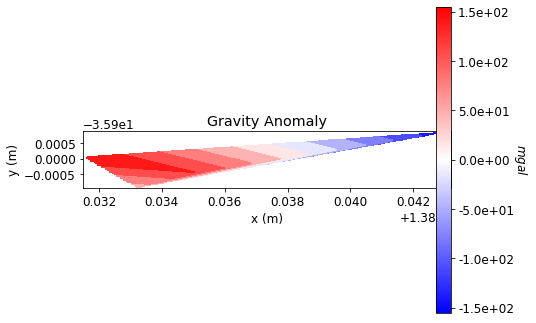

In [14]:
# Plot
mpl.rcParams.update({"font.size": 12})
fig = plt.figure(figsize=(7, 5))

ax1 = fig.add_axes([0.1, 0.1, 0.73, 0.85])
plot2Ddata(receiver_locations_test, dobs_test, ax=ax1, contourOpts={"cmap": "bwr"})
ax1.set_title("Gravity Anomaly")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")

ax2 = fig.add_axes([0.8, 0.1, 0.03, 0.85])
norm = mpl.colors.Normalize(vmin=-np.max(np.abs(dobs_test)), vmax=np.max(np.abs(dobs_test)))
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, orientation="vertical", cmap=mpl.cm.bwr, format="%.1e"
)
cbar.set_label("$mgal$", rotation=270, labelpad=15, size=12)

plt.show()

In [15]:
dobs_test.shape

(4,)

In [16]:
sagrav_test

SURVEY_NAM  BA_1984_MG BASE_STATI  OG_ORIGINA     OG_UNIT  OG_1965_MG  \
51676  KINGSCOTE      14.537       None   979830.69  1965_mgals   979830.69   
52284  KINGSCOTE      15.497       None   979831.33  1965_mgals   979831.33   
52583  KINGSCOTE      15.146       None   979830.50  1965_mgals   979830.50   
52585  KINGSCOTE      15.397       None   979831.59  1965_mgals   979831.59   

        OG_1984_UM  BA_1965_MG  BA_1984_UM NOTES SURVEY_COD  STATION_ID  \
51676  9798162.752      16.428     145.367  PDH4     1968E4         429   
52284  9798169.151      17.388     154.966  PDH2     1968E4         430   
52583  9798160.852      17.038     151.463  None     1968E4         431   
52585  9798171.752      17.289     153.970  PDH3     1968E4         432   

        MGA_EAST   MGA_NORTH  MGA_ZONE   LONGITUDE   LATITUDE  AHD_ELEVAT  \
51676  233134.05  6023199.74        54  138.043196 -35.899130   39.990002   
52284  232080.50  6023077.81        54  138.031496 -35.899940   41.970001   
52583  232237.32  6022972.62        54  138.033196 -35.900929   44.840000   
52585  232407.19  6023032.20        54  138.035096 -35.900439   40.360001   

       OG_1984_MG                     geometry  
51676  979816.275  POINT (138.04319 -35.89914)  
52284  979816.915  POINT (138.03149 -35.89995)  
52583  979816.085  POINT (138.03319 -35.90094)  
52585  979817.175  POINT (138.03509 -35.90045)

In [17]:
maximum_anomaly = np.max(np.abs(dobs_test))

uncertainties = 0.01 * maximum_anomaly * np.ones(np.shape(dobs_test))            

In [18]:
print(i)

90


In [19]:
# Define the receivers. The data consist of vertical gravity anomaly measurements.
# The set of receivers must be defined as a list.
receiver_list = gravity.receivers.Point(receiver_locations_test, components="gz")

receiver_list = [receiver_list]

# Define the source field
source_field = gravity.sources.SourceField(receiver_list=receiver_list)

# Define the survey
survey = gravity.survey.Survey(source_field)

In [20]:
receiver_list

In [21]:
data_object = data.Data(survey, dobs=dobs_test, standard_deviation=uncertainties)

In [22]:
data_object

In [24]:
mesh2
#source_field

TensorMesh: 500 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     10    228,845.79    233,845.79    500.00    500.00    1.00
   y     10  6,018,582.51  6,023,582.51    500.00    500.00    1.00
   z      5     -1,000.00          0.00    200.00    200.00    1.00

In [25]:
# Define density contrast values for each unit in g/cc. Don't make this 0!
# Otherwise the gradient for the 1st iteration is zero and the inversion will
# not converge.
background_density = 1e-6

# Find the indecies of the active cells in forward model (ones below surface)
#ind_active = surface2ind_topo(mesh, xyz_topo)
topo_fake = receiver_locations_test + 399
print(receiver_locations_test)
print(topo_fake)
ind_active = surface2ind_topo(mesh2, receiver_locations_test)
#ind_active = surface2ind_topo(mesh2, topo_fake)
#ind_active = surface2ind_topo(mesh2, topo_fake)

# Define mapping from model to active cells
nC = int(ind_active.sum())
model_map = maps.IdentityMap(nP=nC)  # model consists of a value for each active cell

# Define and plot starting model
starting_model = background_density * np.ones(nC)

[[138.0431963  -35.8991295   39.99000168]
 [138.0314963  -35.8999395   41.97000122]
 [138.0331963  -35.9009295   44.84000015]
 [138.0350963  -35.9004395   40.36000061]]
[[537.0431963  363.1008705  438.99000168]
 [537.0314963  363.1000605  440.97000122]
 [537.0331963  363.0990705  443.84000015]
 [537.0350963  363.0995605  439.36000061]]


In [26]:
nC

500

In [27]:
model_map

In [28]:
ind_active

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [29]:
starting_model

array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
      

In [30]:
simulation = gravity.simulation.Simulation3DIntegral(
    survey=survey, mesh=mesh2, rhoMap=model_map, actInd=ind_active
)

In [31]:
# Define the data misfit. Here the data misfit is the L2 norm of the weighted
# residual between the observed data and the data predicted for a given model.
# Within the data misfit, the residual between predicted and observed data are
# normalized by the data's standard deviation.
dmis = data_misfit.L2DataMisfit(data=data_object, simulation=simulation)

# Define the regularization (model objective function).
reg = regularization.Simple(mesh2, indActive=ind_active, mapping=model_map)

# Define how the optimization problem is solved. Here we will use a projected
# Gauss-Newton approach that employs the conjugate gradient solver.
opt = optimization.ProjectedGNCG(
    maxIter=10, lower=-1.0, upper=1.0, maxIterLS=20, maxIterCG=10, tolCG=1e-3
)

# Here we define the inverse problem that is to be solved
inv_prob = inverse_problem.BaseInvProblem(dmis, reg, opt)

In [32]:
dmis.nD

4

In [33]:
# Defining a starting value for the trade-off parameter (beta) between the data
# misfit and the regularization.
starting_beta = directives.BetaEstimate_ByEig(beta0_ratio=1e0)

# Defining the fractional decrease in beta and the number of Gauss-Newton solves
# for each beta value.
beta_schedule = directives.BetaSchedule(coolingFactor=5, coolingRate=1)

# Options for outputting recovered models and predicted data for each beta.
save_iteration = directives.SaveOutputEveryIteration(save_txt=False)

# Updating the preconditionner if it is model dependent.
update_jacobi = directives.UpdatePreconditioner()

# Setting a stopping criteria for the inversion.
target_misfit = directives.TargetMisfit(chifact=1)

# Add sensitivity weights
sensitivity_weights = directives.UpdateSensitivityWeights(everyIter=False)

# The directives are defined as a list.
directives_list = [
    sensitivity_weights,
    starting_beta,
    beta_schedule,
    save_iteration,
    update_jacobi,
    target_misfit,
]    

In [34]:
# Here we combine the inverse problem and the set of directives
inv = inversion.BaseInversion(inv_prob, directives_list)

# Run inversion
recovered_model = inv.run(starting_model)

SimPEG.InvProblem will set Regularization.mref to m0.

        SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
        ***Done using same Solver and solverOpts as the problem***
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  4.81e-21  1.91e+04  0.00e+00  1.91e+04    4.18e-07      0              
------------------------- STOP! -------------------------
0 : |fc-fOld| = 1.0000e+00 <= tolF*(1+|f0|) = 0.0000e+00
0 : |xc-x_last| = 1.0000e+00 <= tolX*(1+|x0|) = 0.0000e+00
1 : |proj(x-g)-x|    = 4.1762e-07 <= tolG          = 1.0000e-01
1 : |proj(x-g)-x|    = 4.1762e-07 <= 1e3*eps       = 1.0000e-02
0 : maxIter   =      10    <= iter          =      0
------------------------- DONE! -------------------------


In [ ]:

# Plot Recovered Model
fig = plt.figure(figsize=(9, 4))
plotting_map = maps.InjectActiveCells(mesh2, ind_active, np.nan)

ax1 = fig.add_axes([0.1, 0.1, 0.73, 0.8])
#ax1 = fig.add_axes([10.1, 10.1, 73.73, 80.8])
mesh2.plotSlice(
    plotting_map * recovered_model,
    normal="Y",
    ax=ax1,
    ind=int(mesh2.nCy / 2),
    grid=True,
    clim=(np.min(recovered_model), np.max(recovered_model)),
    pcolorOpts={"cmap": "viridis"},
)
ax1.set_title("Model slice at y = 0 m")

ax2 = fig.add_axes([0.85, 0.1, 0.05, 0.8])
norm = mpl.colors.Normalize(vmin=np.min(recovered_model), vmax=np.max(recovered_model))
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, orientation="vertical", cmap=mpl.cm.viridis
)
cbar.set_label("$g/cm^3$", rotation=270, labelpad=15, size=12)

plt.show()

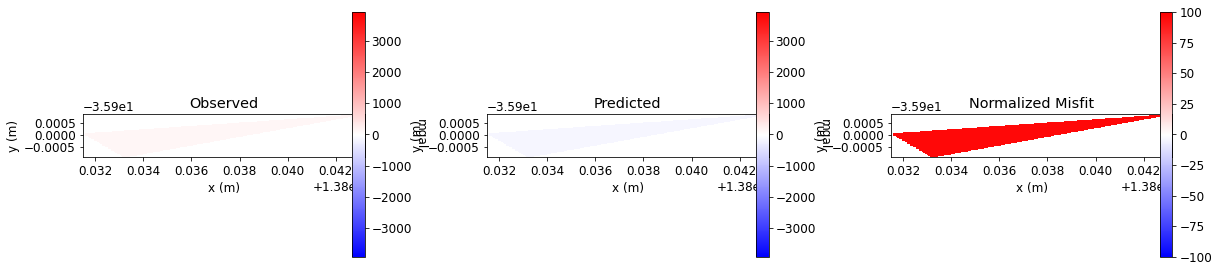

In [40]:
dpred = inv_prob.dpred

# Observed data | Predicted data | Normalized data misfit
data_array = np.c_[dobs_test, dpred, (dobs_test - dpred) / uncertainties]

fig = plt.figure(figsize=(17, 4))
plot_title = ["Observed", "Predicted", "Normalized Misfit"]
plot_units = ["mgal", "mgal", ""]

ax1 = 3 * [None]
ax2 = 3 * [None]
norm = 3 * [None]
cbar = 3 * [None]
cplot = 3 * [None]
v_lim = [np.max(np.abs(dobs)), np.max(np.abs(dobs)), np.max(np.abs(data_array[:, 2]))]

for ii in range(0, 3):

    ax1[ii] = fig.add_axes([0.33 * ii + 0.03, 0.11, 0.23, 0.84])
    cplot[ii] = plot2Ddata(
        receiver_list[0].locations,
        data_array[:, ii],
        ax=ax1[ii],
        ncontour=30,
        clim=(-v_lim[ii], v_lim[ii]),
        contourOpts={"cmap": "bwr"},
    )
    ax1[ii].set_title(plot_title[ii])
    ax1[ii].set_xlabel("x (m)")
    ax1[ii].set_ylabel("y (m)")

    ax2[ii] = fig.add_axes([0.33 * ii + 0.25, 0.11, 0.01, 0.85])
    norm[ii] = mpl.colors.Normalize(vmin=-v_lim[ii], vmax=v_lim[ii])
    cbar[ii] = mpl.colorbar.ColorbarBase(
        ax2[ii], norm=norm[ii], orientation="vertical", cmap=mpl.cm.bwr
    )
    cbar[ii].set_label(plot_units[ii], rotation=270, labelpad=15, size=12)

plt.show()


In [39]:
dpred

array([-3.9781928e-16, -3.9781928e-16, -3.9781928e-16, -2.9836446e-16])

In [2]:
data_source = "https://storage.googleapis.com/simpeg/doc-assets/gravity.tar.gz"

# download the data
downloaded_data = utils.download(data_source, overwrite=True)

# unzip the tarfile
tar = tarfile.open(downloaded_data, "r")
tar.extractall()
tar.close()

# path to the directory containing our data
dir_path = downloaded_data.split(".")[0] + os.path.sep

# files to work with
topo_filename = dir_path + "gravity_topo.txt"
data_filename = dir_path + "gravity_data.obs"
model_filename = dir_path + "true_model.txt"

   saved to: C:\Users\rscott\OneDrive - OZ Minerals\Exploration2021\Invert-the-Gawler\gravity.tar.gz
Download completed!


In [3]:
xyz_topo = np.loadtxt(str(topo_filename))


In [4]:
xyz_topo.shape

(1681, 3)

In [5]:
xyzdobs = np.loadtxt(str(data_filename))

In [6]:
xyzdobs.shape

(289, 4)

In [7]:
xyz_topo[1]

array([-2.0000e+02, -1.9000e+02, -1.0282e-04])

In [8]:
xyzdobs[0]

array([-8.0000e+01, -8.0000e+01,  2.9700e+00,  8.7145e-04])

In [10]:
xyzdobs

array([[-8.0000e+01, -8.0000e+01,  2.9700e+00,  8.7145e-04],
       [-7.0000e+01, -8.0000e+01,  2.4338e+00,  8.2583e-04],
       [-6.0000e+01, -8.0000e+01,  1.8558e+00,  9.4978e-04],
       ...,
       [ 6.0000e+01,  8.0000e+01,  1.8558e+00, -5.9197e-04],
       [ 7.0000e+01,  8.0000e+01,  2.4338e+00, -5.6868e-04],
       [ 8.0000e+01,  8.0000e+01,  2.9700e+00, -5.6579e-04]])

In [260]:
sagrav_test

SURVEY_NAM  BA_1984_MG BASE_STATI  \
69916                 GREAT VICTORIA DESEST     -33.363       None   
676163  PACE COPPER COOMPANA GRAVITY SURVEY     -32.927       None   
676594  PACE COPPER COOMPANA GRAVITY SURVEY     -31.318       None   
676609  PACE COPPER COOMPANA GRAVITY SURVEY     -31.996       None   
676621  PACE COPPER COOMPANA GRAVITY SURVEY     -32.988       None   
677019  PACE COPPER COOMPANA GRAVITY SURVEY     -31.721       None   
677039  PACE COPPER COOMPANA GRAVITY SURVEY     -31.105       None   
677042  PACE COPPER COOMPANA GRAVITY SURVEY     -30.659       None   
677046  PACE COPPER COOMPANA GRAVITY SURVEY     -31.189       None   
679193  PACE COPPER COOMPANA GRAVITY SURVEY     -31.178       None   
680573  PACE COPPER COOMPANA GRAVITY SURVEY     -31.870       None   
680581  PACE COPPER COOMPANA GRAVITY SURVEY     -32.481       None   
681040  PACE COPPER COOMPANA GRAVITY SURVEY     -32.237       None   
681041  PACE COPPER COOMPANA GRAVITY SURVEY     -31.569       None   
681500  PACE COPPER COOMPANA GRAVITY SURVEY     -31.545       None   
683313  PACE COPPER COOMPANA GRAVITY SURVEY     -30.624       None   

        OG_ORIGINA     OG_UNIT  OG_1965_MG   OG_1984_UM  BA_1965_MG  \
69916   979407.100  1965_mgals  979407.100  9793927.092     -32.451   
676163  979392.671  1984_mgals  979407.062  9793926.710     -32.015   
676594  979391.234  1984_mgals  979405.624  9793912.340     -30.415   
676609  979392.803  1984_mgals  979407.194  9793928.030     -31.086   
676621  979392.456  1984_mgals  979406.847  9793924.560     -32.076   
677019  979393.210  1984_mgals  979407.601  9793932.100     -30.811   
677039  979393.099  1984_mgals  979407.489  9793930.990     -30.198   
677042  979391.554  1984_mgals  979405.944  9793915.540     -29.755   
677046  979392.924  1984_mgals  979407.314  9793929.240     -30.281   
679193  979392.302  1984_mgals  979406.692  9793923.020     -30.273   
680573  979393.958  1984_mgals  979408.349  9793939.580     -30.958   
680581  979392.566  1984_mgals  979406.957  9793925.660     -31.571   
681040  979391.833  1984_mgals  979406.223  9793918.330     -31.329   
681041  979390.733  1984_mgals  979405.123  9793907.330     -30.666   
681500  979391.364  1984_mgals  979405.754  9793913.640     -30.640   
683313  979392.881  1984_mgals  979407.271  9793928.810     -29.719   

        BA_1984_UM NOTES SURVEY_COD  STATION_ID   MGA_EAST   MGA_NORTH  \
69916     -333.626  None     197002         181  500770.61  6511071.86   
676163    -329.265  None     2017A1     5001127  501202.34  6510990.80   
676594    -313.179  None     2017A1     5001331  502037.44  6514996.66   
676609    -319.960  None     2017A1     5001334  501983.88  6512013.90   
676621    -329.879  None     2017A1     5001335  501993.38  6511037.12   
677019    -317.208  None     2017A1     5001360  503006.93  6512027.29   
677039    -311.054  None     2017A1     5001361  502953.59  6513070.59   
677042    -306.586  None     2017A1     5001363  502960.44  6515111.59   
677046    -311.890  None     2017A1     5001333  502038.67  6512996.22   
679193    -311.784  None     2017A1     5001362  502961.93  6514040.38   
680573    -318.701  None     2017A1     5001359  503068.32  6510954.73   
680581    -324.812  None     2017A1     5001126  501014.28  6511954.08   
681040    -322.371  None     2017A1     5001125  501026.15  6512906.37   
681041    -315.686  None     2017A1     5001123  501029.88  6515081.37   
681500    -315.452  None     2017A1     5001124  500974.60  6513944.11   
683313    -306.245  None     2017A1     5001332  501996.32  6513965.36   

        MGA_ZONE   LONGITUDE   LATITUDE  AHD_ELEVAT  OG_1984_MG  \
69916         52  129.008118 -31.535291  100.489998  979392.709   
676163        52  129.012666 -31.536022  103.199997  979392.671   
676594        52  129.021455 -31.499878  103.889999  979391.234   
676609        52  129.020897 -31.526790  103.480003  979392.803   
676621        52  129.020999 -31.535603 

In [261]:
dobs_test

array([-333.626, -329.265, -313.179, -319.96 , -329.879, -317.208,
       -311.054, -306.586, -311.89 , -311.784, -318.701, -324.812,
       -322.371, -315.686, -315.452, -306.245])

In [262]:
survey_array_test[0]

array([ 129.0081178 ,  -31.5352912 ,  100.48999786, -333.626     ])

In [263]:
receiver_locations_test[0]

array([129.0081178 , -31.5352912 , 100.48999786])

In [265]:
print(survey)

In [273]:
survey.nD

16

In [274]:
data

<module 'SimPEG.data' from 'C:\\Users\\rscott\\miniconda3\\envs\\avant2\\lib\\site-packages\\SimPEG\\data.py'>

In [275]:
data.noise_floor

AttributeError: module 'SimPEG.data' has no attribute 'noise_floor'

In [277]:
mesh2

TensorMesh: 1,000 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     10        129.00        129.04      0.00      0.00    1.00
   y     10        -31.54        -31.49      0.00      0.00    1.00
   z     10       -500.00          0.00     50.00     50.00    1.00

TypeError: 'TensorMesh' object is not subscriptable

In [306]:
xyzdobs

array([[-8.0000e+01, -8.0000e+01,  2.9700e+00,  8.7145e-04],
       [-7.0000e+01, -8.0000e+01,  2.4338e+00,  8.2583e-04],
       [-6.0000e+01, -8.0000e+01,  1.8558e+00,  9.4978e-04],
       ...,
       [ 6.0000e+01,  8.0000e+01,  1.8558e+00, -5.9197e-04],
       [ 7.0000e+01,  8.0000e+01,  2.4338e+00, -5.6868e-04],
       [ 8.0000e+01,  8.0000e+01,  2.9700e+00, -5.6579e-04]])

In [307]:
recovered_model

array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
       1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
      

In [3]:
from SimPEG.utils import plot2Ddata, surface2ind_topo

ModuleNotFoundError: No module named 'SimPEG'